In [7]:
from collections import ChainMap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import EasyEnsembleClassifier

from util import *

In [2]:
x_train, x_test, y_train, y_test = load_data('var_w1.csv')
x_train.head()

,ssn_name_dob_count_7,ssn_dob_count_0_by_14,name_dob_count_0_by_14,ssn_firstname_count_0_by_14,name_count_7,fulladdress_homephone_count_0_by_14,name_day_since,homephone_count_7,homephone_count_3,address_count_1_by_7,...,fulladdress_homephone_count_7,ssn_firstname_count_7,ssn_lastname_count_0_by_14,ssn_lastname_day_since,ssn_name_count_7,name_count_14,ssn_count_7,ssn_dob_count_7,ssn_lastname_count_7,ssn_name_day_since
661175,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,0.940508,-0.769214,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,0.742526,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,0.741995
319831,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,-0.241150,-0.769214,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,-0.446132,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-0.446655
266732,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,-0.420762,-0.769214,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,-0.626808,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-0.627330
549489,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,0.552924,0.055132,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,0.352646,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,0.352118
369392,-0.055635,0.118004,0.118316,0.123528,-0.115648,0.120387,-0.070992,-0.769214,-0.521454,0.103441,...,-0.057263,-0.057185,0.123458,-0.274966,-0.057109,-0.159376,-0.058092,-0.055708,-0.057154,-0.275489


In [5]:
nn = MLPClassifier((100,), learning_rate_init=0.01, verbose=1).fit(x_train, y_train)
print(fdr(nn, x_train, y_train))
print(fdr(nn, x_test, y_test))

Iteration 1, loss = 0.05106573
Iteration 2, loss = 0.04910147
Iteration 3, loss = 0.04889677
Iteration 4, loss = 0.04866563
Iteration 5, loss = 0.04862690
Iteration 6, loss = 0.04852418
Iteration 7, loss = 0.04848832
Iteration 8, loss = 0.04841574
Iteration 9, loss = 0.04840225
Iteration 10, loss = 0.04844143
Iteration 11, loss = 0.04837196
Iteration 12, loss = 0.04837431
Iteration 13, loss = 0.04837338
Iteration 14, loss = 0.04833429
Iteration 15, loss = 0.04837924
Iteration 16, loss = 0.04835720
Iteration 17, loss = 0.04835626
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.5325139470013946
0.5220814789455666


In [11]:
nn = MLPClassifier((100,), learning_rate_init=0.001, verbose=1).fit(x_train, y_train)
print(fdr(nn, x_train, y_train))
print(fdr(nn, x_test, y_test))

Iteration 1, loss = 0.05733666
Iteration 2, loss = 0.04833396
Iteration 3, loss = 0.04812294
Iteration 4, loss = 0.04797798
Iteration 5, loss = 0.04787389
Iteration 6, loss = 0.04783505
Iteration 7, loss = 0.04772320
Iteration 8, loss = 0.04769655
Iteration 9, loss = 0.04761283
Iteration 10, loss = 0.04760213
Iteration 11, loss = 0.04754495
Iteration 12, loss = 0.04754267
Iteration 13, loss = 0.04745639
Iteration 14, loss = 0.04749684
Iteration 15, loss = 0.04743195
Iteration 16, loss = 0.04741379
Iteration 17, loss = 0.04741647
Iteration 18, loss = 0.04739404
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
0.534431659693166
0.5217391304347826


In [5]:
clfs = list()
for i in range(10):
    x_resample, y_resample = RandomUnderSampler().fit_resample(x_train, y_train)
    clf = MLPClassifier((1000,), learning_rate_init=0.01, verbose=0).fit(x_resample, y_resample)
    clfs.append(clf)
    print(f'Iteration {i}: with loss {clf.loss_}')
prob = sum([c.predict_proba(x_test) for c in clfs]) / len(clfs)
fdr_prob(y_test, prob)

Iteration 0: with loss 0.48167356660726385
Iteration 1: with loss 0.4785211025491436
Iteration 2: with loss 0.4822980681138491
Iteration 3: with loss 0.4805464431638996
Iteration 4: with loss 0.4769622058420434
Iteration 5: with loss 0.4801283139305787
Iteration 6: with loss 0.48291215962351147
Iteration 7: with loss 0.4788628155283076
Iteration 8: with loss 0.48310211593188596
Iteration 9: with loss 0.48083155896833035


0.5217391304347826

In [11]:
ee = EasyEnsembleClassifier(base_estimator=MLPClassifier((100,), learning_rate_init=0.01, verbose=0),
                            n_estimators=10,
                            n_jobs=2,
                            verbose=0).fit(x_train, y_train)


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   26.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:   26.8s finished


TypeError: plot_report() missing 2 required positional arguments: 'x' and 'y'

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.7s finished


FDR: 0.5213967819239986



[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


              precision    recall  f1-score   support

           0       0.99      0.97      0.98    197079
           1       0.22      0.53      0.31      2921

    accuracy                           0.97    200000
   macro avg       0.61      0.75      0.65    200000
weighted avg       0.98      0.97      0.97    200000



[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s finished


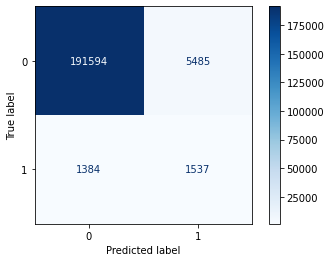

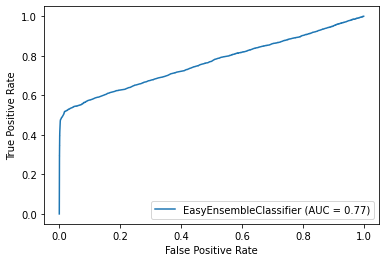

In [12]:
plot_report(ee, x_test, y_test)